<div class="alert alert-block alert-success">

# The Hotel Booking Dataset 


### *Stay long and pay less*
- When is the most ideal time of year to reserve a hotel room?
- How long can you remain in a hotel room and spend the least amount of money?<br>
<br>

### In this notebook, we will investigate potential answers to such questions using the hotel booking dataset from: https://www.kaggle.com/jessemostipak/hotel-booking-demand

<br>

### **Research questen : predicting the possibilty of a booking**

## The notebook has three goals to address the research issues listed above:
1. Applying EDA on the dataset
2.  Performing features engineering .
3.  Training ML model .
<br>


### The datset : 
 The data comes from Nuno Antonio, Ana Almeida, and Luis Nunes' article Hotel Booking Demand Datasets, published in Data in Brief Volume 22, February 2019.
 Thomas Mock and Antoine Bichat retrieved and cleaned the data for #TidyTuesday during the week of February 11th, 2020.
 This data collection provides **booking information for a city hotel and a resort hotel**, including dates of booking, duration of stay, number of individuals, children, and/or infants, and available parking spots, along with other variables.


</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
import missingno as msno
warnings.filterwarnings("ignore")

### Reading the dataset :

In [2]:
data=pd.read_csv('hotel_bookings.csv')
data.shape

(119390, 32)

### The dataset is considered large and wide . To better summrize the coumns types we will use info() function to only print a summary of columns count and its dtype . 

In [3]:

data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Columns: 32 entries, hotel to reservation_status_date
dtypes: float64(4), int64(16), object(12)
memory usage: 29.1+ MB


### To invastigate missing values we will use pandas isnull function , to visulaize the missing proption we will use missingno module. 

In [4]:
data.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### The missingno module provied varuios ways to plot the missing data portion , however most of them are in black and white .

<AxesSubplot:>

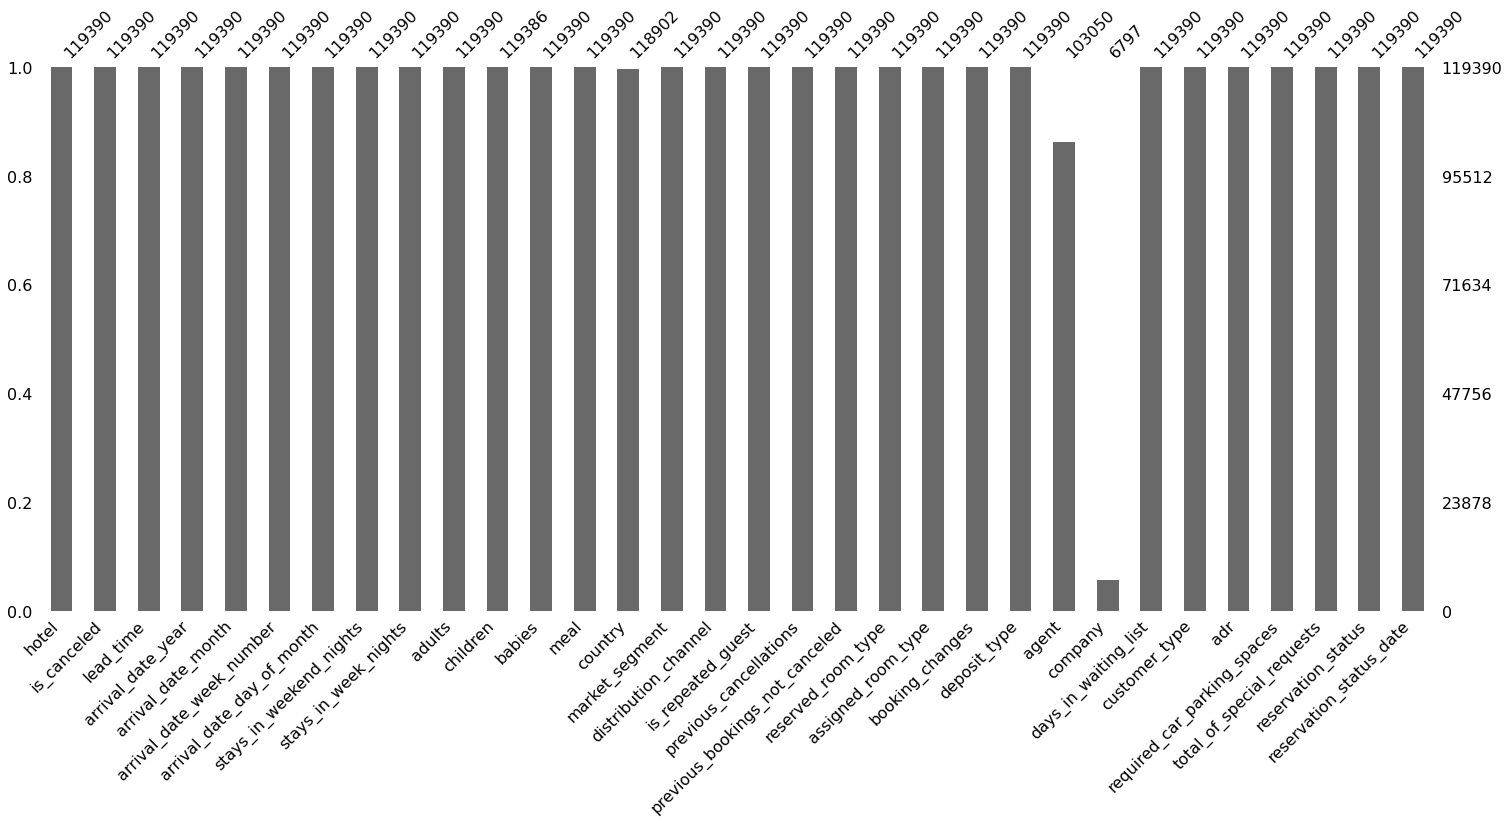

In [5]:
msno.bar(data)

 ### One way to use the module in plotting colored plots is using heatmap , it not as readable as other ways and it calculate the correlation between columns with missing values (nullity correlation) :
   -  Negative correlation -1 
   -  No correlation 0
   -  Positive correlation 1

<AxesSubplot:>

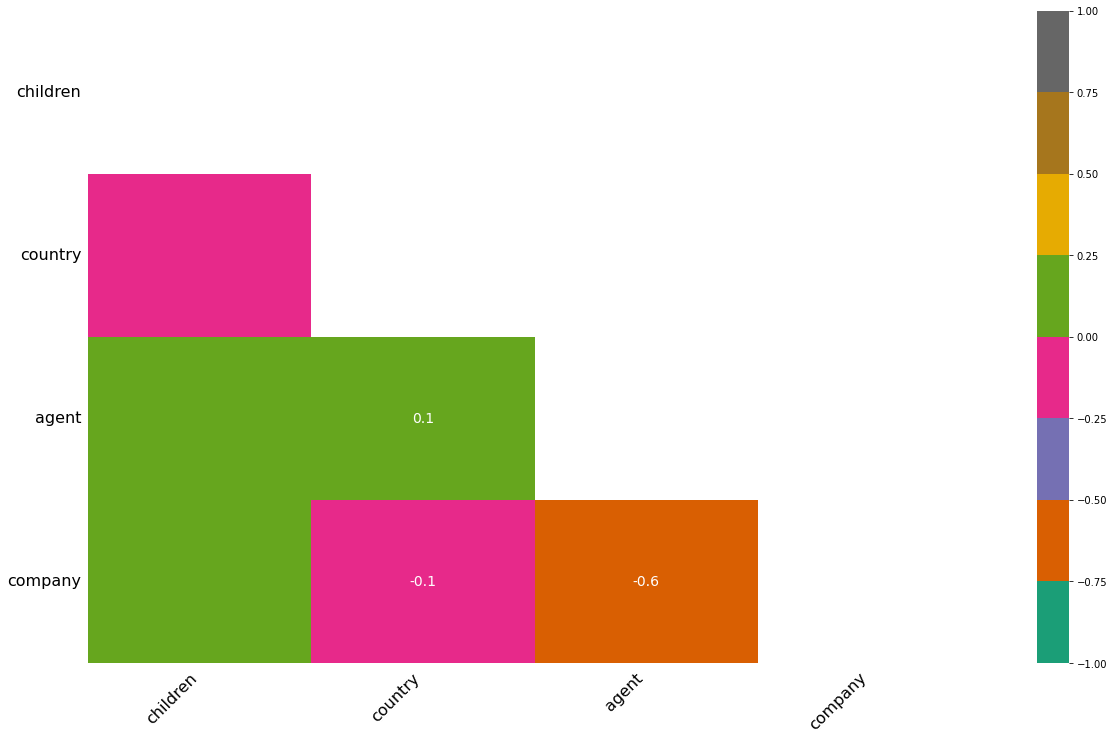

In [6]:
msno.heatmap(data,cmap="Dark2")

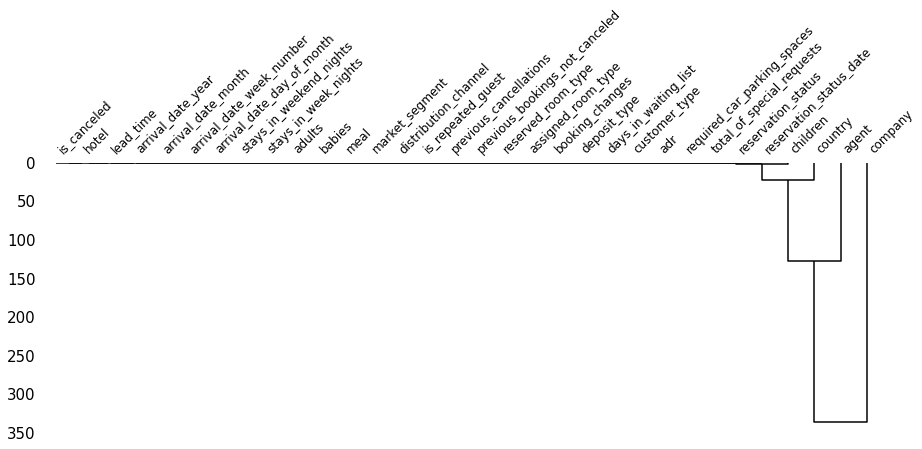

In [7]:
msno.dendrogram(data,figsize=(15,5), fontsize=12);

### Obviously, the company column has a huge number of missing values, imputing may harm the learning process, and dropping the rows will cost us most of the dataset, dropping the column is valid but when we think about the dataset objects it is expected to have huge missing values in the company column since most of the customers will be families or individuals. So instead of dropping the column, we will divide the dataset into two datasets. The first will have the information of the customers who are families or individuals and the second will hold the customers whose reservations were made or paid by companies.

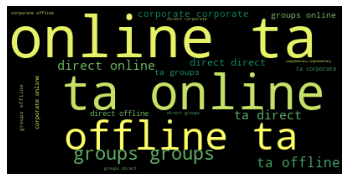

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string=" ".join(data['market_segment'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black', 
                      max_words=300, colormap="summer"
                         ).generate(word_string)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#data=data.drop("company", axis=1)

In [18]:
data["company"]=data["company"].fillna("n")

In [22]:
indev_data= data[data['company'] == "n"]
company_data = data[data['company'] != "n"]

In [23]:
indev_data.shape
company_data.shape

(6797, 32)

In [26]:
data.shape

(119390, 32)

### Let's drop the company column and continue

In [24]:
indev_data = indev_data.drop("company", axis=1)

## 1. Applying EDA on the dataset
-   Numrice columns :

### Exploratory Data Analysis aims is used to provied an insight into a data set structure and help us to discover patterns in data . It can be deliverd by summarizing the dataset and/or plotting the relation and the pattrens visually . The describe method in pandas provieds all the basice DA on the numrice columns of the dataset as following :

In [25]:
indev_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,112593.000000,112593.000000,112593.000000,112593.000000,112593.000000,112593.000000,112593.000000,112593.000000,112589.000000,112593.000000,112593.000000,112593.000000,112593.000000,112593.000000,102833.000000,112593.000000,112593.000000,112593.000000,112593.000000
mean,0.382200,107.327027,2016.157079,27.249651,15.804464,0.953985,2.538453,1.889869,0.109229,0.008269,0.019007,0.082714,0.037569,0.208183,86.448757,2.443465,103.917250,0.059506,0.590738
std,0.485927,107.222310,0.707068,13.472778,8.794536,1.003160,1.913635,0.567167,0.407966,0.099527,0.136548,0.856345,0.533258,0.632549,110.645239,18.067862,50.606282,0.239889,0.799269
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,21.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.000000,0.000000,0.000000
75%,1.000000,164.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


### *we only have 20 numrice column so we only get describtion of those columns , other columns are string*

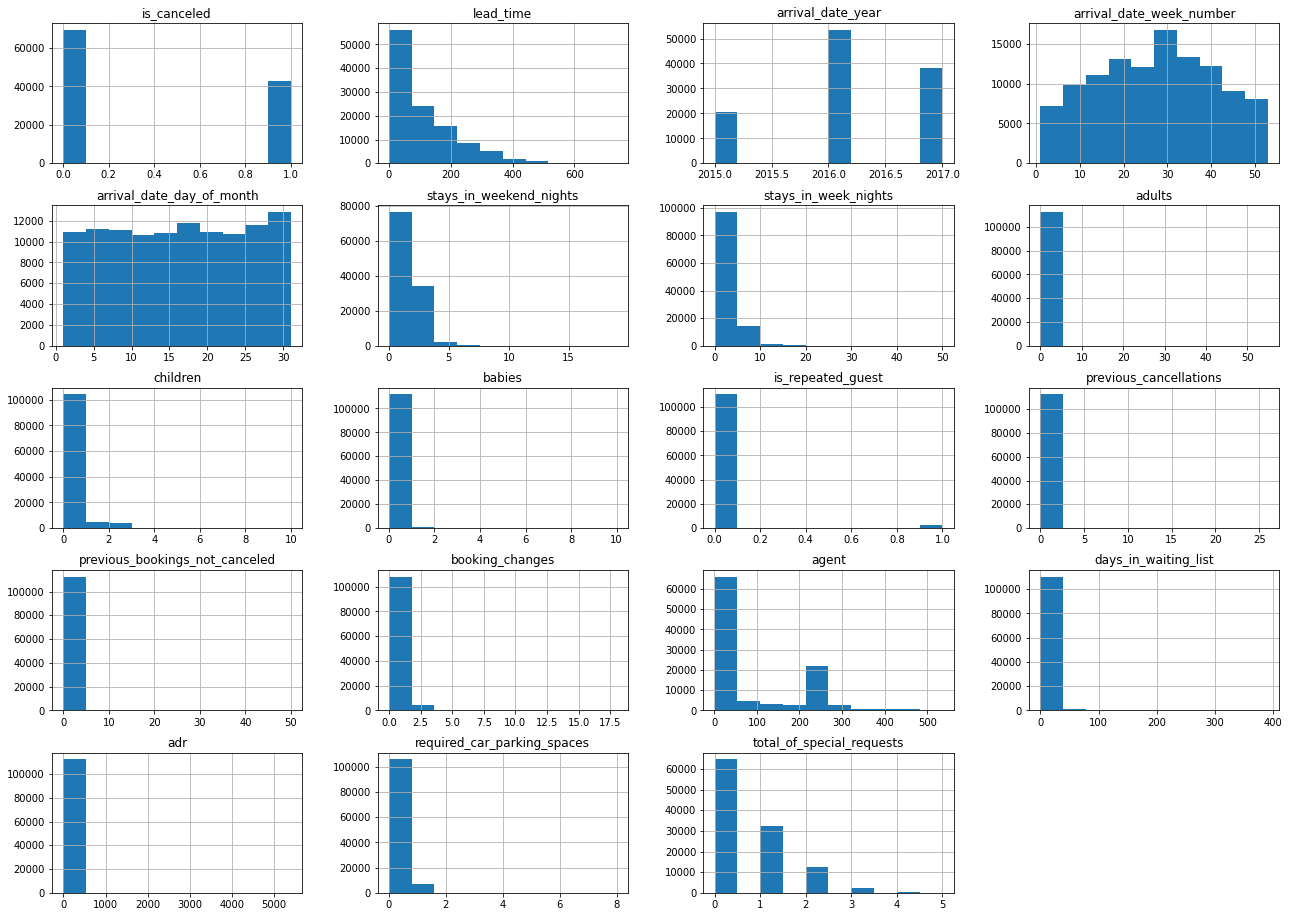

In [28]:
indev_data.hist(figsize=(22,16))
plt.show()

### Pandas also offers hist() which results in a histogram plots for each column . the histogram  represent  the distribution of the column. The hist function calls matplotlib.pyplot.hist() . 

## 1. Applying EDA on the dataset
-   String columns :
### So far we have used pandas functions (describe and hist ) thy both only work for numrice columns so the hotel column for example , is still not explored . In the datset discribtion it's stated that the hotel column will contain two unique values (City Hotel and Resort Hotel) we can check that ourselves and we can also plot the distrbution of these values by calling the hist function . 

## *We can use hist() to plot all the 32 columns using value_counts as shown below , but we would prefer more extenstive exploring*

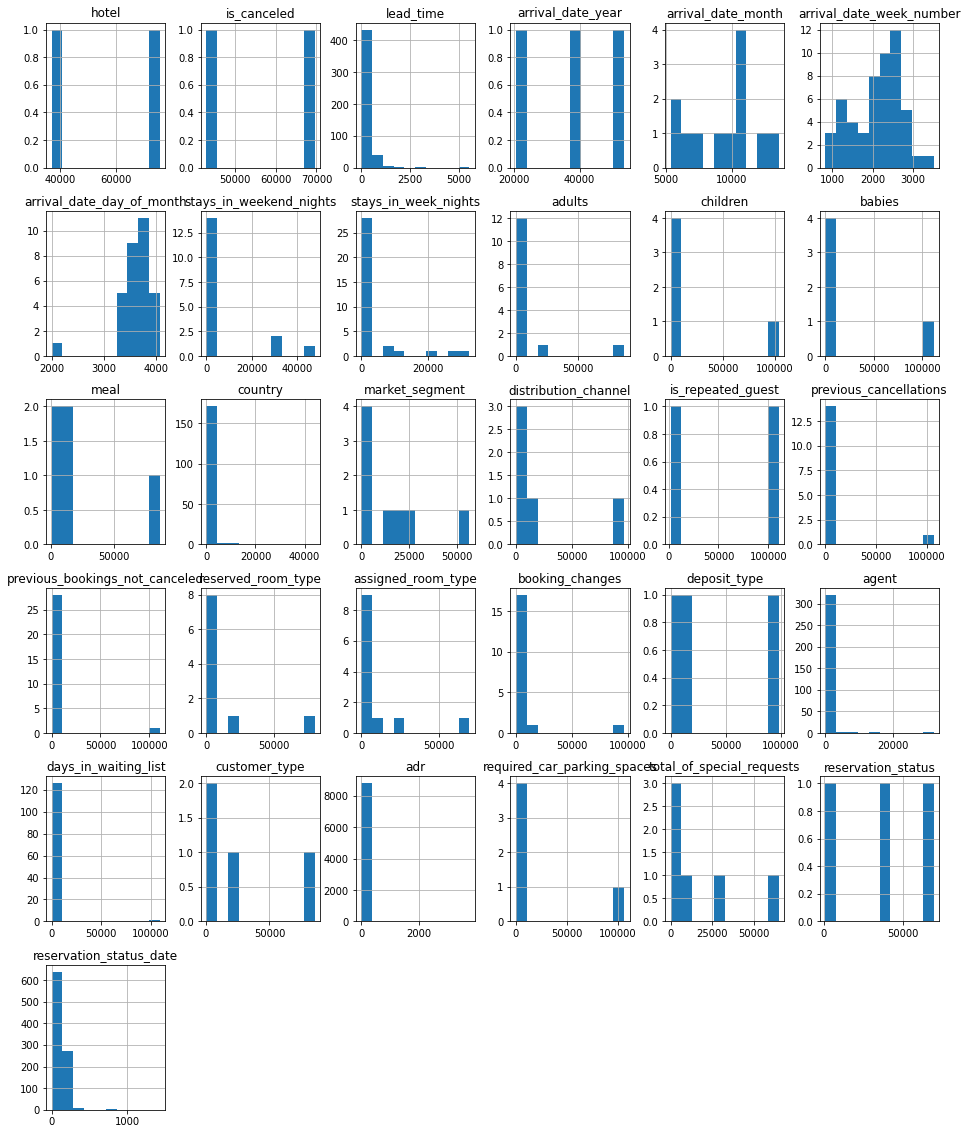

In [30]:
indev_data.apply(pd.value_counts).hist(figsize=(16,20))
plt.show()

Text(0, 0.5, 'Observation Counts')

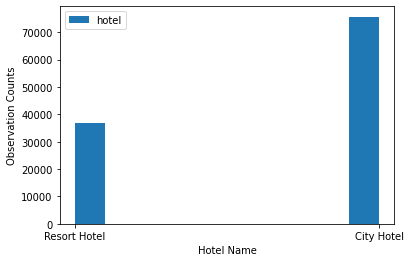

In [31]:
ax=indev_data["hotel"].hist(grid=False,legend=True)
ax.set_xlabel("Hotel Name")
ax.set_ylabel("Observation Counts")


In [32]:
data["hotel"].unique()
data["hotel"].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

### The *City Hotel* observation is almost **double** the *Resort Hotel* observation and this might be a problem when splitting the datset for training and testing , we need to make sure we are using a random selection splitting function . 

### Now we apply the same to the second dataset 

In [33]:
company_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,217.000000,6797.000000,6797.000000,6797.000000,6797.000000
mean,0.175224,49.087980,2016.147859,25.765779,15.695160,0.490511,1.868324,1.302045,0.015448,0.002648,0.245697,0.160071,1.785788,0.435486,202.617512,0.294983,67.274186,0.112403,0.250405
std,0.380187,83.355696,0.714188,15.570111,8.550549,0.802497,1.696999,0.489276,0.157871,0.051397,0.430531,0.607468,5.638983,0.892959,111.487444,5.071176,34.200345,0.317742,0.590514
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,2016.000000,12.000000,9.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,185.000000,0.000000,42.000000,0.000000,0.000000
50%,0.000000,9.000000,2016.000000,23.000000,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,185.000000,0.000000,66.000000,0.000000,0.000000
75%,0.000000,51.000000,2017.000000,42.000000,22.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,324.000000,0.000000,87.130000,0.000000,0.000000
max,1.000000,365.000000,2017.000000,53.000000,31.000000,14.000000,35.000000,4.000000,3.000000,1.000000,1.000000,6.000000,72.000000,21.000000,444.000000,185.000000,315.000000,2.000000,4.000000


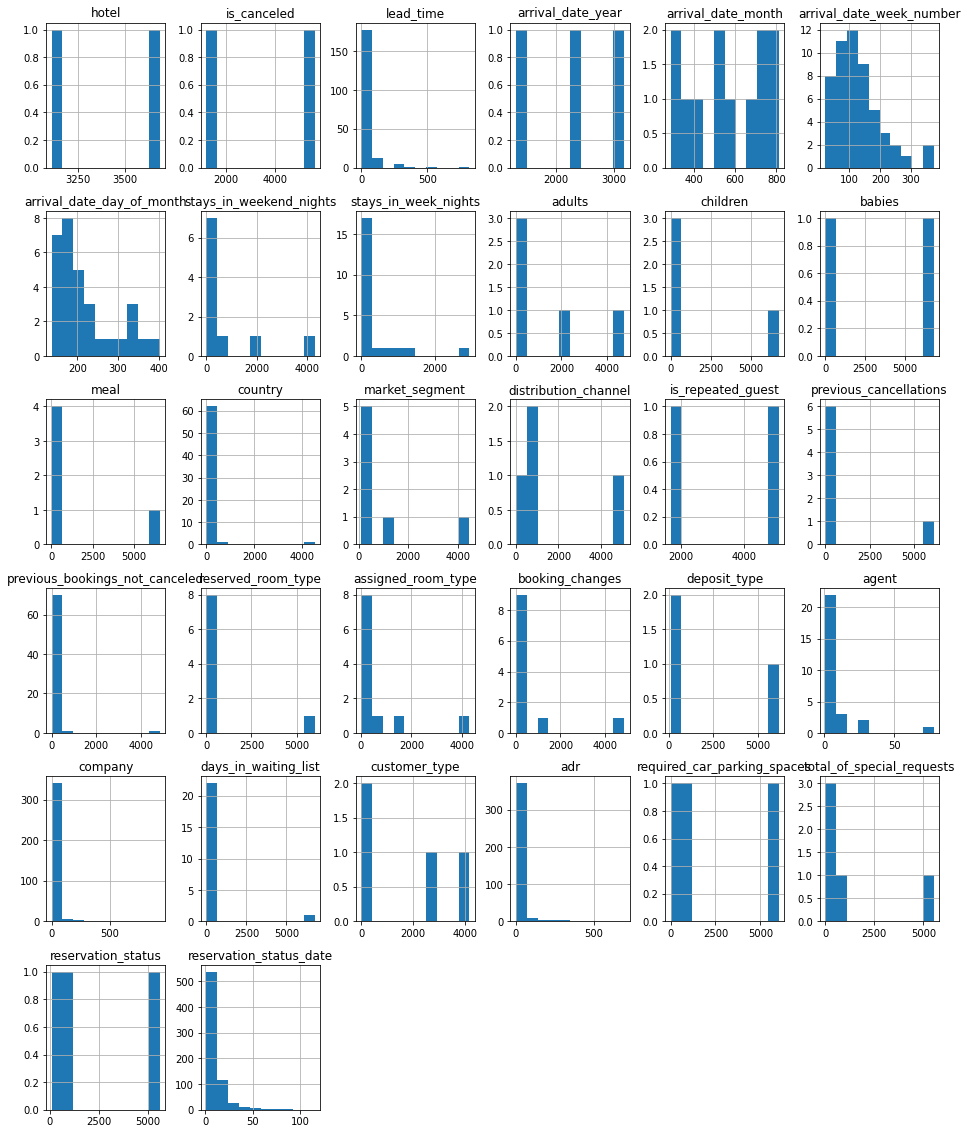

In [35]:
company_data.apply(pd.value_counts).hist(figsize=(16,20))
plt.show()

#### In the next step, I will apply a Machine Learning algorithm to predict the possibility of a booking .

In [37]:
indev_data.to_csv(path_or_buf="indev_data.csv",index=False)

In [ ]:
company_data.to_csv(path_or_buf="company_data.csv",index=False)